# Frontrunners / Slipstreamers

In [5]:
#importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os.path
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
#creating dataframes from the .csv files
length_1000 = pd.read_csv(os.getcwd() + "\\project_files\\length_1000.csv")
length_1200 = pd.read_csv(os.getcwd() + "\\project_files\\length_1200.csv")
length_1400 = pd.read_csv(os.getcwd() + "\\project_files\\length_1400.csv")
length_1600 = pd.read_csv(os.getcwd() + "\\project_files\\length_1600.csv")
length_1650 = pd.read_csv(os.getcwd() + "\\project_files\\length_1650.csv")
length_1800 = pd.read_csv(os.getcwd() + "\\project_files\\length_1800.csv")
length_2000 = pd.read_csv(os.getcwd() + "\\project_files\\length_2000.csv")
length_2200 = pd.read_csv(os.getcwd() + "\\project_files\\length_2200.csv")
length_2400 = pd.read_csv(os.getcwd() + "\\project_files\\length_2400.csv")

# Dataframe Refining
##### This section is dedicated to editing the dataframes to be suitable for the research question; Since they have been cleaned already in a previous notebook we will just be deciding what columns we want to keep for the question of Frontrunner vs Slipstreamer.

In [7]:
#creating a function to handle dropping the unneeded rows for the research question
def df_refine(df):
    df = df.drop(['Unnamed: 0', 'track_condition', 'actual_weight','jockey','declared_horse_weight', 'horse_id', 'race_course', 'race_name', 'track', 'src', 'race_date', 'race_number', 'race_class', 'trainer', 'draw', 'length_behind_winner', 'win_odds', 'sectional_time', 'incident_report', 'horse_number',], axis=1)
    return df

In [8]:
#refining the dataframes with the function above
length_1000 = df_refine(length_1000)
length_1200 = df_refine(length_1200)
length_1400 = df_refine(length_1400)
length_1600 = df_refine(length_1600)
length_1650 = df_refine(length_1650)
length_1800 = df_refine(length_1800)
length_2000 = df_refine(length_2000)
length_2200 = df_refine(length_2200)
length_2400 = df_refine(length_2400)

In [9]:
length_1800['finishing_position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '4 DH', 'DISQ', '11 DH', '6 DH', 'PU', '5 DH', '3 DH',
       '2 DH', 'DNF', 'UR', 'FE', '9 DH'], dtype=object)

In [10]:
#creating a function to handle the various strings found within the finishing_position column, -1 represents a DNF value
def no_more_strings(df):
    stringarray=['DH', 'UR', 'PU', 'FE', 'DNF', 'DISQ']
    for string in stringarray:
        df['finishing_position'] = df['finishing_position'].str.replace(" ","")
        if string == 'DH':
            df['finishing_position'] = df['finishing_position'].str.replace(string, '')
        else:
            df['finishing_position'] = df['finishing_position'].str.replace(string, '-1')
    return df

In [11]:
#cleaning the finishing_positon column of strings using a function created above
length_1000 = no_more_strings(length_1000)
length_1200 = no_more_strings(length_1200)
length_1400 = no_more_strings(length_1400)
length_1600 = no_more_strings(length_1600)
length_1650 = no_more_strings(length_1650)
length_1800 = no_more_strings(length_1800)
length_2000 = no_more_strings(length_2000)
length_2200 = no_more_strings(length_2200)
length_2400 = no_more_strings(length_2400)

In [12]:
#testing to see if any strings still appear
length_1800['finishing_position'].unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '-1'], dtype=object)

In [13]:
#checking dtypes
length_1400.dtypes

race_id                object
race_distance           int64
finishing_position     object
horse_name             object
running_position_1    float64
running_position_2    float64
running_position_3    float64
running_position_4    float64
finish_time            object
dtype: object

In [14]:
#creating a function to handle the data type conversation of finishing_position to float accross all dataframes
def finishing_position_conversion(df):
    df['finishing_position'] = df['finishing_position'].astype(float)
    return df

In [15]:
#converting the data type of finishing_position to float across all dataframes using the function above
length_1000 = finishing_position_conversion(length_1000)
length_1200 = finishing_position_conversion(length_1200)
length_1400 = finishing_position_conversion(length_1400)
length_1600 = finishing_position_conversion(length_1600)
length_1650 = finishing_position_conversion(length_1650)
length_1800 = finishing_position_conversion(length_1800)
length_2000 = finishing_position_conversion(length_2000)
length_2200 = finishing_position_conversion(length_2200)
length_2400 = finishing_position_conversion(length_2400)

In [16]:
#checking the dtypes
length_1600.dtypes

race_id                object
race_distance           int64
finishing_position    float64
horse_name             object
running_position_1    float64
running_position_2    float64
running_position_3    float64
running_position_4    float64
finish_time            object
dtype: object

## Frontrunner Definition:
##### For 1000(m) races; I have decided to define "frontrunner" as the horse that is holding a 1st position any given section.

#### The Great Definition; Chapter 1
##### Initially, I ran into issues when coming up with a way to visualise whether Frontrunners or Slipstreamers were more effective; My initial definition of Frontrunner was any horse holding a 1st, 2nd or 3rd position in the first two sections of a three section 1000 metre race, however I came to realise that this was assuming too much and not taking into account instances where horses were not in winning positions for the first section but did gain ground for the 2nd. This issue was addressed by changing my definition of Frontrunner to any horse that is in 1st place only and I would begin to try to visualise this section by section in the races. My plan was to make a dataframe out of horses in the frontrunner position for section 1, likewise for section 2 the whole way up to whatever amount of sections each race has; This will allow me to get some well rounded data by seeing how those horses finished in their races.

#### Function Use
##### Below is a function created to create the dataframes that handle frontrunners for various sections; I attempted first to merge all the race length dataframes in order to make it easier to create dataframes for the frontrunners however since each dataframe had different amounts of columns due to race lengths being different I could not append or merge them. The next idea I had was to create a function that somehow identified the race lengths in a race and created dataframes based on that but unfortunately I could not figure out a way that could do this easily so I adopted the idea to create a function specifally aimed at 3 section races, one for 4 sections, one for 5 sections and finally one for 6 sections; this sadly, also fell short as I could not get the function to create more then one dataframe per function, being unsure whether this was my coding inexperience what you see before in my final attempt that arrived at the conclusion I intended.

In [17]:
#creating functions to create dataframes out of frontrunners for various sections (sections 1-5)
def frontrunner_section1(df):
    df = df.loc[df['running_position_1'] == 1.0]
    return df

def frontrunner_section2(df):
    df = df.loc[df['running_position_2'] == 1.0]
    return df

def frontrunner_section3(df):
    df = df.loc[df['running_position_3'] == 1.0]
    return df

def frontrunner_section4(df):
    df = df.loc[df['running_position_4'] == 1.0]
    return df

def frontrunner_section5(df):
    df = df.loc[df['running_position_5'] == 1.0]
    return df

In [18]:
#creating dataframes for all the section 1 frontrunners accross all race lengths
frontrunner_section1_1000 = frontrunner_section1(length_1000)
frontrunner_section1_1200 = frontrunner_section1(length_1200)
frontrunner_section1_1400 = frontrunner_section1(length_1400)
frontrunner_section1_1600 = frontrunner_section1(length_1600)
frontrunner_section1_1650 = frontrunner_section1(length_1650)
frontrunner_section1_1800 = frontrunner_section1(length_1800)
frontrunner_section1_2000 = frontrunner_section1(length_2000)
frontrunner_section1_2200 = frontrunner_section1(length_2200)
frontrunner_section1_2400 = frontrunner_section1(length_2400)

In [19]:
#creating dataframes for all the section 2 frontrunners accross all race lengths
frontrunner_section2_1000 = frontrunner_section2(length_1000)
frontrunner_section2_1200 = frontrunner_section2(length_1200)
frontrunner_section2_1400 = frontrunner_section2(length_1400)
frontrunner_section2_1600 = frontrunner_section2(length_1600)
frontrunner_section2_1650 = frontrunner_section2(length_1650)
frontrunner_section2_1800 = frontrunner_section2(length_1800)

In [20]:
#creating dataframes for all the section 3 frontrunners accross all relevent race lengths
frontrunner_section3_1400 = frontrunner_section3(length_1400)
frontrunner_section3_1600 = frontrunner_section3(length_1600)
frontrunner_section3_1650 = frontrunner_section3(length_1650)
frontrunner_section3_1800 = frontrunner_section3(length_1800)

In [21]:
#creating dataframes for all the section 4 frontrunners accross all relevent race lengths
frontrunner_section4_1800 = frontrunner_section4(length_1800)

## Slipstreamer Definition:
##### This definition was considerably more difficult to nail down; Scientifically slipstreaming is the action of reducing aerodynamic drag by positioning your horse behind or beside another horse. The effect isn't insignificant either, given the right angle it could reduce drag by upwards and above 50%; Here is a link to a web page discussing the topic about wind tunnel simulations done at the Royal Melbourne Institute of Technology; https://www.horsejournals.com/slipstreaming-reduces-drag-horse-racing-66-percent
##### I am defining "slipstreamer" as any horse that is not in the first 3 positions of a given section to be safe (position >=4), there is a case to argue that 3rd place is slipstreaming however considering that there are many races where the first three horses are three abrest I wanted to play it safe and am unfortunately limited to accounting any other situations as outliers as the data doesn't have positional data relative to horses and other horses near them. Finally the slipstreamer definition will also be any position from 8 down, I have decided this in an attempt to not drag the average down needlessly. So, to summarize the definition of Slipstreamer will be any horse in a position of >=4 & <=8.

In [22]:
#creating functions to create dataframes out of slipstreamers for various sections (sections 1-5)
def slipstreamer_p4(df):
    df = df.loc[(df['running_position_1'] == 4.0)]
    return df

def slipstreamer_p5(df):
    df = df.loc[(df['running_position_1'] == 5.0)]
    return df

def slipstreamer_p6(df):
    df = df.loc[(df['running_position_1'] == 6.0)]
    return df

def slipstreamer_p7(df):
    df = df.loc[(df['running_position_1'] == 7.0)]
    return df

def slipstreamer_p8(df):
    df = df.loc[(df['running_position_1'] == 8.0)]
    return df

def slipstreamer_section1(df):
    df = df.loc[(df['running_position_1'] >= 4.0) & (df['running_position_1'] <= 8)]
    return df

def slipstreamer_section2(df):
    df = df.loc[(df['running_position_1'] >= 4.0) & (df['running_position_1'] <= 8)]
    return df

In [23]:
#creating dataframes for all the section 1 slipstreamers accross all race lengths
#race length 1000
slipstreamer_p4_1000 = slipstreamer_p4(length_1000)
slipstreamer_p5_1000 = slipstreamer_p5(length_1000)
slipstreamer_p6_1000 = slipstreamer_p6(length_1000)
slipstreamer_p7_1000 = slipstreamer_p7(length_1000)
slipstreamer_p8_1000 = slipstreamer_p8(length_1000)

#race length 1200
slipstreamer_p4_1200 = slipstreamer_p4(length_1200)
slipstreamer_p5_1200 = slipstreamer_p5(length_1200)
slipstreamer_p6_1200 = slipstreamer_p6(length_1200)
slipstreamer_p7_1200 = slipstreamer_p7(length_1200)
slipstreamer_p8_1200 = slipstreamer_p8(length_1200)

#race length 1400
slipstreamer_p4_1400 = slipstreamer_p4(length_1400)
slipstreamer_p5_1400 = slipstreamer_p5(length_1400)
slipstreamer_p6_1400 = slipstreamer_p6(length_1400)
slipstreamer_p7_1400 = slipstreamer_p7(length_1400)
slipstreamer_p8_1400 = slipstreamer_p8(length_1400)

#race length 1600
slipstreamer_p4_1600 = slipstreamer_p4(length_1600)
slipstreamer_p5_1600 = slipstreamer_p5(length_1600)
slipstreamer_p6_1600 = slipstreamer_p6(length_1600)
slipstreamer_p7_1600 = slipstreamer_p7(length_1600)
slipstreamer_p8_1600 = slipstreamer_p8(length_1600)

#race length 1650
slipstreamer_p4_1650 = slipstreamer_p4(length_1650)
slipstreamer_p5_1650 = slipstreamer_p5(length_1650)
slipstreamer_p6_1650 = slipstreamer_p6(length_1650)
slipstreamer_p7_1650 = slipstreamer_p7(length_1650)
slipstreamer_p8_1650 = slipstreamer_p8(length_1650)

#race length 1800
slipstreamer_p4_1800 = slipstreamer_p4(length_1800)
slipstreamer_p5_1800 = slipstreamer_p5(length_1800)
slipstreamer_p6_1800 = slipstreamer_p6(length_1800)
slipstreamer_p7_1800 = slipstreamer_p7(length_1800)
slipstreamer_p8_1800 = slipstreamer_p8(length_1800)

#test example of inaccurate way to show slipstreaming
slipstreamer_section1_1000 = slipstreamer_section1(length_1000)
slipstreamer_section1_1200 = slipstreamer_section1(length_1200)
slipstreamer_section2_1000 = slipstreamer_section2(length_1000)
slipstreamer_section2_1200 = slipstreamer_section2(length_1200)

##### Below is an example of two graphs that are created by using data where the horses position in section 1 was (>=4 & <=8) and I calculated averages based on those parameters. However, as we can see in the cell below, these graphs are very limited as they show a big regression to the mean. This happens due to the type of positional data I've been using; since theres only 14 positions, when calculating averages it will always point towards the mean in a big way. 
##### So instead of using graphs like these I will instead find the average positions of horses that are in a certain position such as (== 4). This will allow me to single out certain positions in the race and see if they increased their position by races end which I believe will be easier to understand and show more well rounded results.

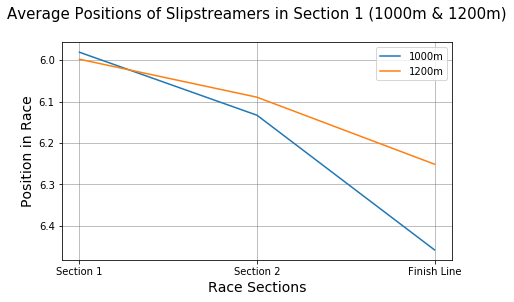

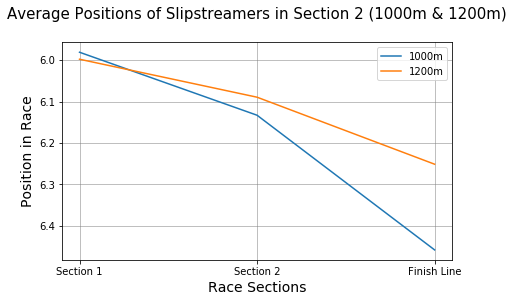

In [24]:
#creating line graphs to show slipstreaming positions
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers in Section 1 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_1000_means = slipstreamer_section1_1000.filter(like='position_').mean()
slipstreamer_1200_means = slipstreamer_section1_1200.filter(like='position_').mean()
slipstreamer_1000_means.plot(ax=ax)
slipstreamer_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers in Section 2 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_1000_means = slipstreamer_section2_1000.filter(like='position_').mean()
slipstreamer_1200_means = slipstreamer_section2_1200.filter(like='position_').mean()
slipstreamer_1000_means.plot(ax=ax)
slipstreamer_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

## Tailgater Definition:
##### I have decided to split slipstreamer into two segments; Slipstremer and Tailgater. As mentioned before a slipstreamer is any horse holding a >=4 & <=8 position in any given point in the race, this allows me to show graphs depicting the effect slipstreaming has at different sections of the pack and not needlessly drag the average down. Tailgators will be defined as any horse holding a >=9 position.

In [25]:
#creating functions to create dataframes out of tailgaters for various positions
def tailgater_p9(df):
    df = df.loc[(df['running_position_1'] == 9.0)]
    return df

def tailgater_p10(df):
    df = df.loc[(df['running_position_1'] == 10.0)]
    return df

def tailgater_p11(df):
    df = df.loc[(df['running_position_1'] == 11.0)]
    return df

def tailgater_p12(df):
    df = df.loc[(df['running_position_1'] == 12.0)]
    return df

def tailgater_p13(df):
    df = df.loc[(df['running_position_1'] == 13.0)]
    return df

def tailgater_p14(df):
    df = df.loc[(df['running_position_1'] == 14.0)]
    return df

In [26]:
#creating dataframes for all the section 1 tailgaters accross all race lengths
tailgater_p9_1000 = tailgater_p9(length_1000)
tailgater_p10_1000 = tailgater_p10(length_1000)
tailgater_p11_1000 = tailgater_p11(length_1000)
tailgater_p12_1000 = tailgater_p12(length_1000)
tailgater_p13_1000 = tailgater_p13(length_1000)
tailgater_p14_1000 = tailgater_p14(length_1000)

#race length 1200
tailgater_p9_1200 = tailgater_p9(length_1200)
tailgater_p10_1200 = tailgater_p10(length_1200)
tailgater_p11_1200 = tailgater_p11(length_1200)
tailgater_p12_1200 = tailgater_p12(length_1200)
tailgater_p13_1200 = tailgater_p13(length_1200)
tailgater_p14_1200 = tailgater_p14(length_1200)

#race length 1400
tailgater_p9_1400 = tailgater_p9(length_1400)
tailgater_p10_1400 = tailgater_p10(length_1400)
tailgater_p11_1400 = tailgater_p11(length_1400)
tailgater_p12_1400 = tailgater_p12(length_1400)
tailgater_p13_1400 = tailgater_p13(length_1400)
tailgater_p14_1400 = tailgater_p14(length_1400)

#race length 1600
tailgater_p9_1600 = tailgater_p9(length_1600)
tailgater_p10_1600 = tailgater_p10(length_1600)
tailgater_p11_1600 = tailgater_p11(length_1600)
tailgater_p12_1600 = tailgater_p12(length_1600)
tailgater_p13_1600 = tailgater_p13(length_1600)
tailgater_p14_1600 = tailgater_p14(length_1600)

#race length 1650
tailgater_p9_1650 = tailgater_p9(length_1650)
tailgater_p10_1650 = tailgater_p10(length_1650)
tailgater_p11_1650 = tailgater_p11(length_1650)
tailgater_p12_1650 = tailgater_p12(length_1650)
tailgater_p13_1650 = tailgater_p13(length_1650)
tailgater_p14_1650 = tailgater_p14(length_1650)

#race length 1800
tailgater_p9_1800 = tailgater_p9(length_1800)
tailgater_p10_1800 = tailgater_p10(length_1800)
tailgater_p11_1800 = tailgater_p11(length_1800)
tailgater_p12_1800 = tailgater_p12(length_1800)
tailgater_p13_1800 = tailgater_p13(length_1800)
tailgater_p14_1800 = tailgater_p14(length_1800)

## Winner Definition: 
##### Anyone that had a finishing position of 1st Place

In [27]:
#creating a function to create dataframes out of winners for various race lengths
def finishing_win(df):
    df = df.loc[df['finishing_position'] == 1.0]
    return df

In [28]:
#creating dataframes for all winners of every race length
winners_1000 = finishing_win(length_1000)
winners_1200 = finishing_win(length_1200)
winners_1400 = finishing_win(length_1400)
winners_1600 = finishing_win(length_1600)
winners_1650 = finishing_win(length_1650)
winners_1800 = finishing_win(length_1800)

# 1000m & 1200m Races
### Frontrunners

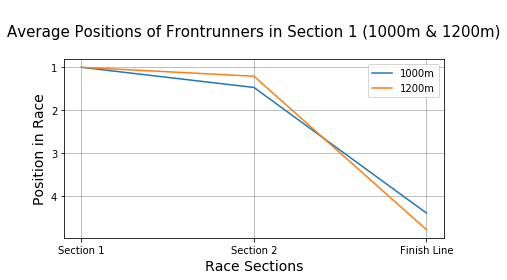

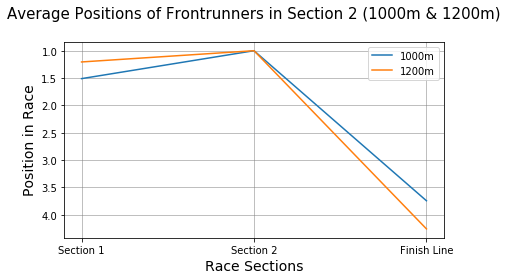

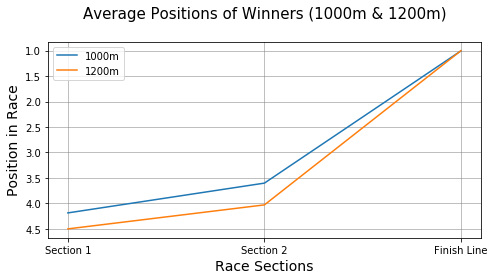

In [29]:
#creating line graphs to show frontrunner positions
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('\nAverage Positions of Frontrunners in Section 1 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1000_means = frontrunner_section1_1000.filter(like='position_').mean()
frontrunner_1200_means = frontrunner_section1_1200.filter(like='position_').mean()
frontrunner_1000_means.plot(ax=ax)
frontrunner_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('section1_averages_1000_1200_final.jpeg')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Frontrunners in Section 2 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1000_means = frontrunner_section2_1000.filter(like='position_').mean()
frontrunner_1200_means = frontrunner_section2_1200.filter(like='position_').mean()
frontrunner_1000_means.plot(ax=ax)
frontrunner_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('section2_averages_1000_1200_final.jpeg')

#creating a graph to show average positions of winners throughout race
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Winners (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
winner_1000_means = winners_1000.filter(like='position_').mean()
winner_1200_means = winners_1200.filter(like='position_').mean()
winner_1000_means.plot(ax=ax)
winner_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('winners_averages_1000_1200_final.jpeg')

### Slipstreamers and Tailgaters

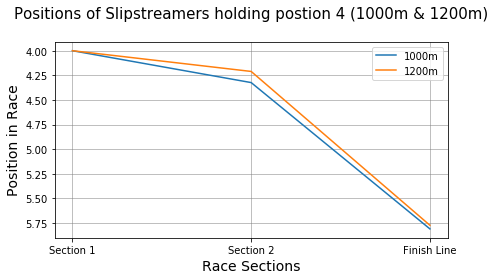

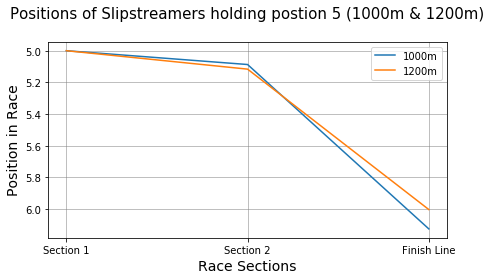

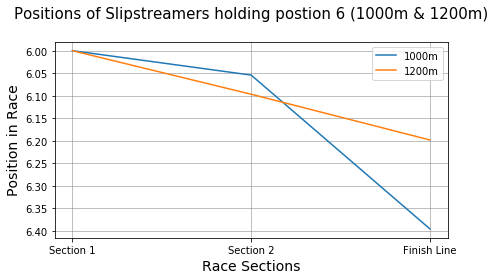

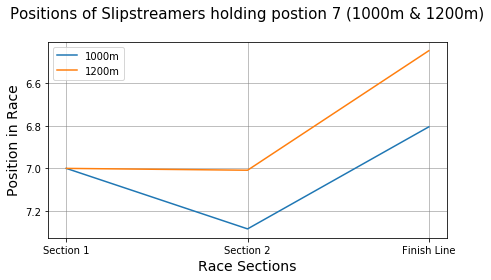

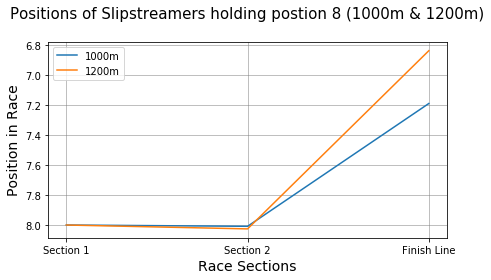

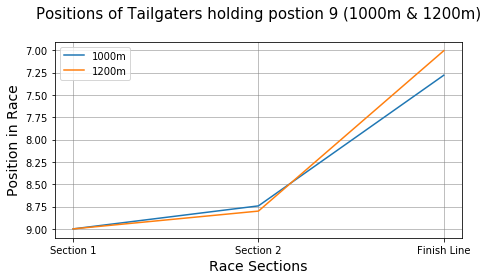

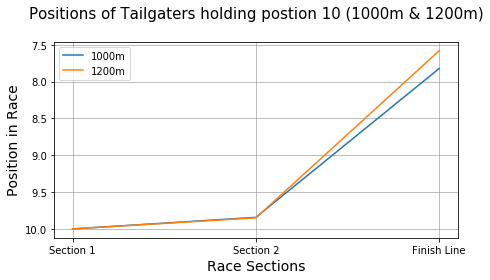

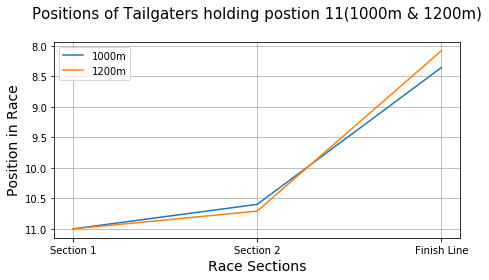

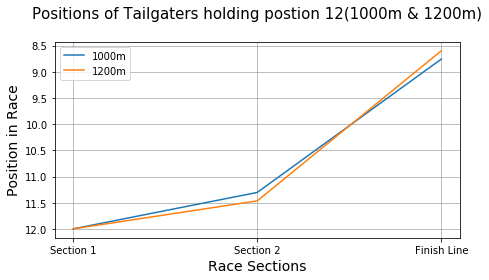

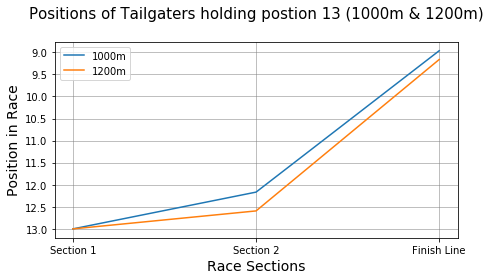

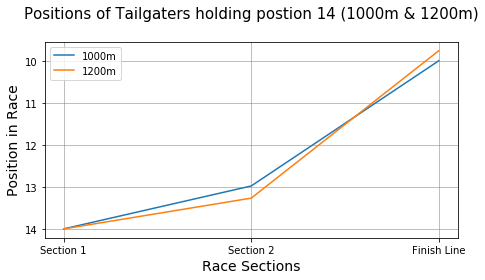

In [30]:
#creating line graphs to show slipstreaming positions
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Slipstreamers holding postion 4 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p4_1000_means = slipstreamer_p4_1000.filter(like='position_').mean()
slipstreamer_p4_1200_means = slipstreamer_p4_1200.filter(like='position_').mean()
slipstreamer_p4_1000_means.plot(ax=ax)
slipstreamer_p4_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers1_averages_1000_1200_final.jpeg')

#creating line graphs to show slipstreaming positions
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Slipstreamers holding postion 5 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p5_1000_means = slipstreamer_p5_1000.filter(like='position_').mean()
slipstreamer_p5_1200_means = slipstreamer_p5_1200.filter(like='position_').mean()
slipstreamer_p5_1000_means.plot(ax=ax)
slipstreamer_p5_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers2_averages_1000_1200_final.jpeg')

# Position 6 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Slipstreamers holding postion 6 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p6_1000_means = slipstreamer_p6_1000.filter(like='position_').mean()
slipstreamer_p6_1200_means = slipstreamer_p6_1200.filter(like='position_').mean()
slipstreamer_p6_1000_means.plot(ax=ax)
slipstreamer_p6_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers3_averages_1000_1200_final.jpeg')

# Position 7 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Slipstreamers holding postion 7 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p7_1000_means = slipstreamer_p7_1000.filter(like='position_').mean()
slipstreamer_p7_1200_means = slipstreamer_p7_1200.filter(like='position_').mean()
slipstreamer_p7_1000_means.plot(ax=ax)
slipstreamer_p7_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers4_averages_1000_1200_final.jpeg')

# Position 8 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Slipstreamers holding postion 8 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p8_1000_means = slipstreamer_p8_1000.filter(like='position_').mean()
slipstreamer_p8_1200_means = slipstreamer_p8_1200.filter(like='position_').mean()
slipstreamer_p8_1000_means.plot(ax=ax)
slipstreamer_p8_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers5_averages_1000_1200_final.jpeg')

# Position 9 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Tailgaters holding postion 9 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p9_1000_means = tailgater_p9_1000.filter(like='position_').mean()
tailgater_p9_1200_means = tailgater_p9_1200.filter(like='position_').mean()
tailgater_p9_1000_means.plot(ax=ax)
tailgater_p9_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers6_averages_1000_1200_final.jpeg')

# Position 10 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Tailgaters holding postion 10 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p10_1000_means = tailgater_p10_1000.filter(like='position_').mean()
tailgater_p10_1200_means = tailgater_p10_1200.filter(like='position_').mean()
tailgater_p10_1000_means.plot(ax=ax)
tailgater_p10_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers7_averages_1000_1200_final.jpeg')

# Position 11 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Tailgaters holding postion 11(1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p11_1000_means = tailgater_p11_1000.filter(like='position_').mean()
tailgater_p11_1200_means = tailgater_p11_1200.filter(like='position_').mean()
tailgater_p11_1000_means.plot(ax=ax)
tailgater_p11_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers8_averages_1000_1200_final.jpeg')

# Position 12 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Tailgaters holding postion 12(1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p12_1000_means = tailgater_p12_1000.filter(like='position_').mean()
tailgater_p12_1200_means = tailgater_p12_1200.filter(like='position_').mean()
tailgater_p12_1000_means.plot(ax=ax)
tailgater_p12_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers9_averages_1000_1200_final.jpeg')

# Position 13 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Tailgaters holding postion 13 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p13_1000_means = tailgater_p13_1000.filter(like='position_').mean()
tailgater_p13_1200_means = tailgater_p13_1200.filter(like='position_').mean()
tailgater_p13_1000_means.plot(ax=ax)
tailgater_p13_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers10_averages_1000_1200_final.jpeg')

# Position 14 in Section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Tailgaters holding postion 14 (1000m & 1200m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p14_1000_means = tailgater_p14_1000.filter(like='position_').mean()
tailgater_p14_1200_means = tailgater_p14_1200.filter(like='position_').mean()
tailgater_p14_1000_means.plot(ax=ax)
tailgater_p14_1200_means.plot(ax=ax)
ax.legend(['1000m', '1200m'])
ax.set_xticks(range(3))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('slipstreamers11_averages_1000_1200_final.jpeg')

## 1400m, 1600m & 1650m Races
### Frontrunners

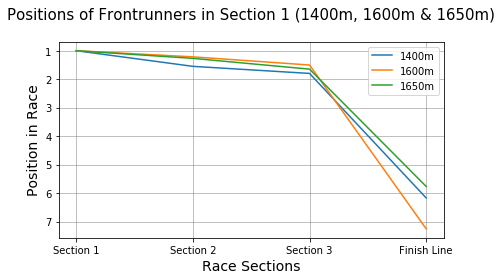

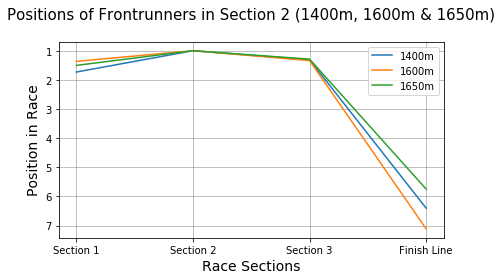

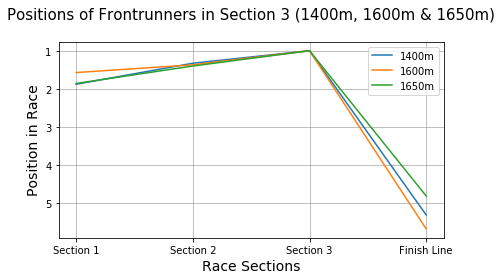

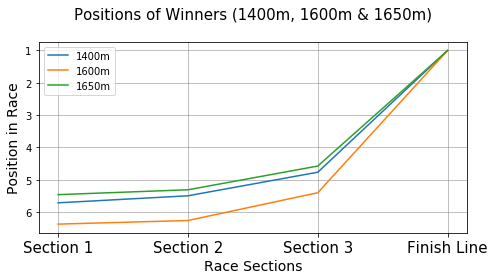

In [31]:
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Frontrunners in Section 1 (1400m, 1600m & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1400_means = frontrunner_section1_1400.filter(like='position_').mean()
frontrunner_1600_means = frontrunner_section1_1600.filter(like='position_').mean()
frontrunner_1650_means = frontrunner_section1_1650.filter(like='position_').mean()
frontrunner_1400_means.plot(ax=ax)
frontrunner_1600_means.plot(ax=ax)
frontrunner_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('section1_averages_1400_1600_1650_final.jpeg')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Frontrunners in Section 2 (1400m, 1600m & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1400_means = frontrunner_section2_1400.filter(like='position_').mean()
frontrunner_1600_means = frontrunner_section2_1600.filter(like='position_').mean()
frontrunner_1650_means = frontrunner_section2_1650.filter(like='position_').mean()
frontrunner_1400_means.plot(ax=ax)
frontrunner_1600_means.plot(ax=ax)
frontrunner_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('section2_averages_1400_1600_1650_final.jpeg')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Frontrunners in Section 3 (1400m, 1600m & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1400_means = frontrunner_section3_1400.filter(like='position_').mean()
frontrunner_1600_means = frontrunner_section3_1600.filter(like='position_').mean()
frontrunner_1650_means = frontrunner_section3_1650.filter(like='position_').mean()
frontrunner_1400_means.plot(ax=ax)
frontrunner_1600_means.plot(ax=ax)
frontrunner_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('section3_averages_1400_1600_1650_final.jpeg')

#creating a graph to show average positions of winners throughout race
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Positions of Winners (1400m, 1600m & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
winner_1400_means = winners_1400.filter(like='position_').mean()
winner_1600_means = winners_1600.filter(like='position_').mean()
winner_1650_means = winners_1650.filter(like='position_').mean()
winner_1400_means.plot(ax=ax)
winner_1600_means.plot(ax=ax)
winner_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'], fontsize = 15)
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('winners_averages_1400_1600_1650_final.jpeg')

### Slipstreamers and Tailgaters

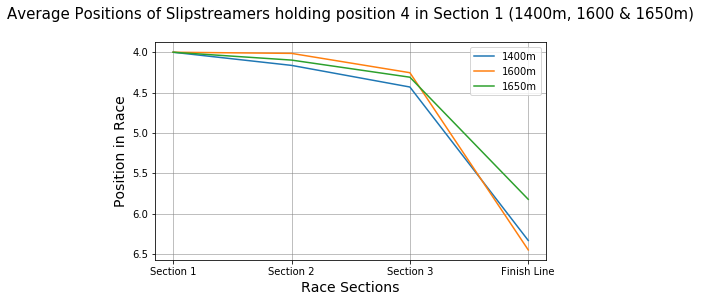

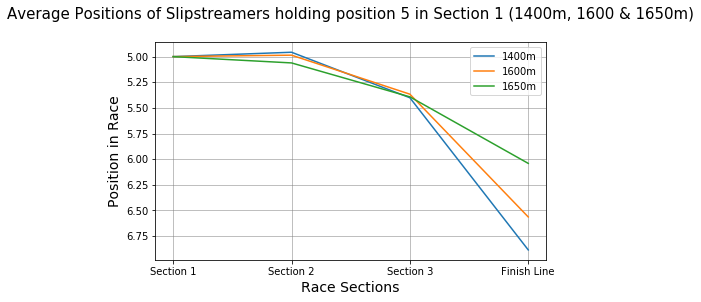

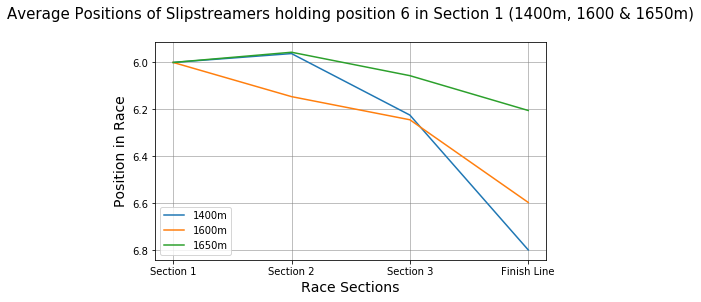

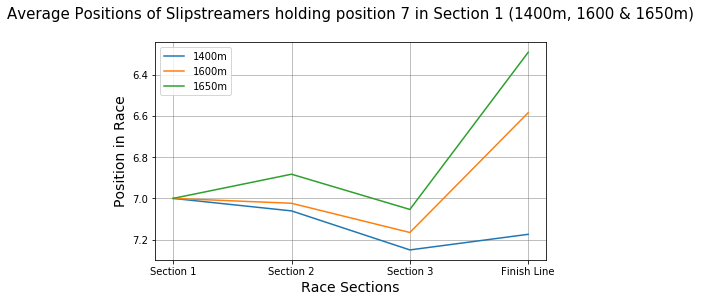

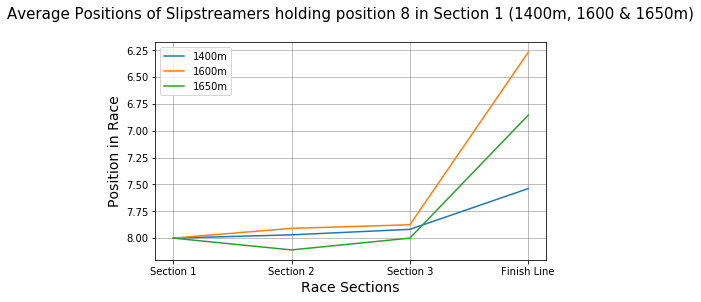

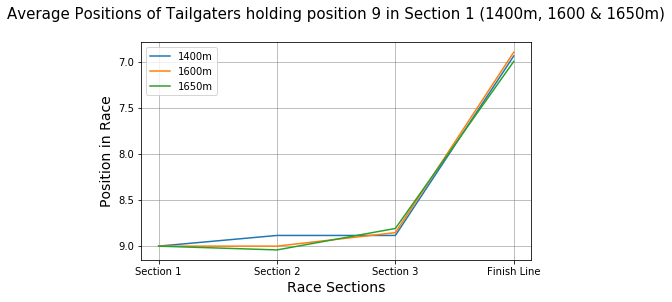

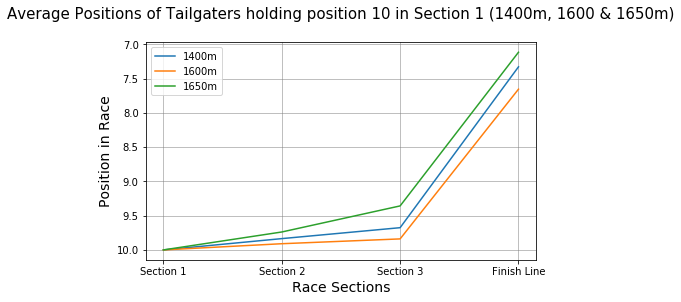

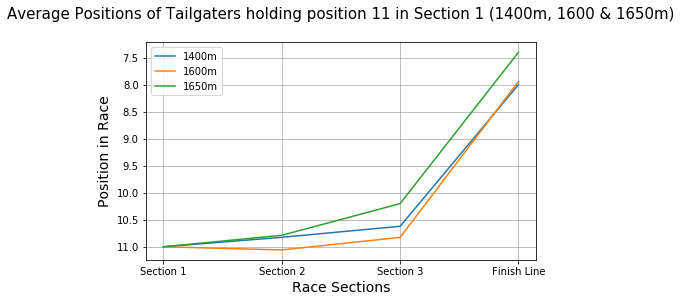

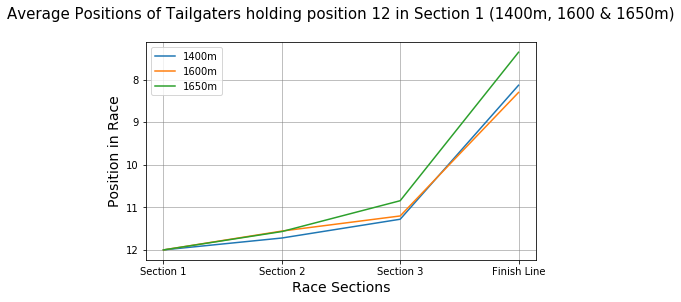

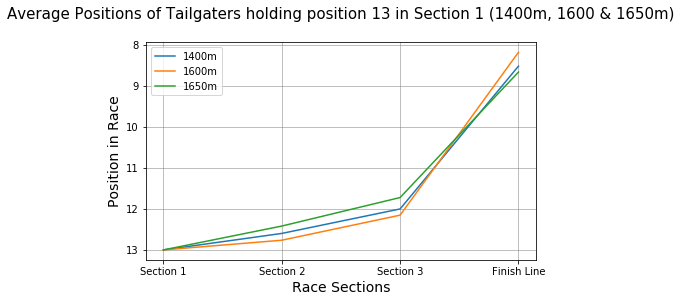

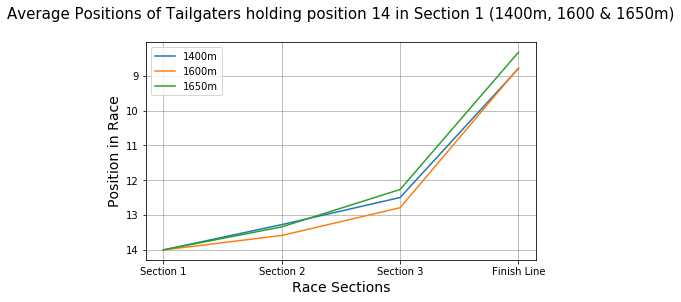

In [32]:
#creating line graphs to show slipstreaming and tailgater positions
#position 4 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 4 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p4_1400_means = slipstreamer_p4_1400.filter(like='position_').mean()
slipstreamer_p4_1600_means = slipstreamer_p4_1600.filter(like='position_').mean()
slipstreamer_p4_1650_means = slipstreamer_p4_1650.filter(like='position_').mean()
slipstreamer_p4_1400_means.plot(ax=ax)
slipstreamer_p4_1600_means.plot(ax=ax)
slipstreamer_p4_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 5 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 5 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p5_1400_means = slipstreamer_p5_1400.filter(like='position_').mean()
slipstreamer_p5_1600_means = slipstreamer_p5_1600.filter(like='position_').mean()
slipstreamer_p5_1650_means = slipstreamer_p5_1650.filter(like='position_').mean()
slipstreamer_p5_1400_means.plot(ax=ax)
slipstreamer_p5_1600_means.plot(ax=ax)
slipstreamer_p5_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 6 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 6 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p6_1400_means = slipstreamer_p6_1400.filter(like='position_').mean()
slipstreamer_p6_1600_means = slipstreamer_p6_1600.filter(like='position_').mean()
slipstreamer_p6_1650_means = slipstreamer_p6_1650.filter(like='position_').mean()
slipstreamer_p6_1400_means.plot(ax=ax)
slipstreamer_p6_1600_means.plot(ax=ax)
slipstreamer_p6_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 7 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 7 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p7_1400_means = slipstreamer_p7_1400.filter(like='position_').mean()
slipstreamer_p7_1600_means = slipstreamer_p7_1600.filter(like='position_').mean()
slipstreamer_p7_1650_means = slipstreamer_p7_1650.filter(like='position_').mean()
slipstreamer_p7_1400_means.plot(ax=ax)
slipstreamer_p7_1600_means.plot(ax=ax)
slipstreamer_p7_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 8 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 8 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p8_1400_means = slipstreamer_p8_1400.filter(like='position_').mean()
slipstreamer_p8_1600_means = slipstreamer_p8_1600.filter(like='position_').mean()
slipstreamer_p8_1650_means = slipstreamer_p8_1650.filter(like='position_').mean()
slipstreamer_p8_1400_means.plot(ax=ax)
slipstreamer_p8_1600_means.plot(ax=ax)
slipstreamer_p8_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 9 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 9 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p9_1400_means = tailgater_p9_1400.filter(like='position_').mean()
tailgater_p9_1600_means = tailgater_p9_1600.filter(like='position_').mean()
tailgater_p9_1650_means = tailgater_p9_1650.filter(like='position_').mean()
tailgater_p9_1400_means.plot(ax=ax)
tailgater_p9_1600_means.plot(ax=ax)
tailgater_p9_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 10 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 10 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p10_1400_means = tailgater_p10_1400.filter(like='position_').mean()
tailgater_p10_1600_means = tailgater_p10_1600.filter(like='position_').mean()
tailgater_p10_1650_means = tailgater_p10_1650.filter(like='position_').mean()
tailgater_p10_1400_means.plot(ax=ax)
tailgater_p10_1600_means.plot(ax=ax)
tailgater_p10_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 11 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 11 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p11_1400_means = tailgater_p11_1400.filter(like='position_').mean()
tailgater_p11_1600_means = tailgater_p11_1600.filter(like='position_').mean()
tailgater_p11_1650_means = tailgater_p11_1650.filter(like='position_').mean()
tailgater_p11_1400_means.plot(ax=ax)
tailgater_p11_1600_means.plot(ax=ax)
tailgater_p11_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 12 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 12 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p12_1400_means = tailgater_p12_1400.filter(like='position_').mean()
tailgater_p12_1600_means = tailgater_p12_1600.filter(like='position_').mean()
tailgater_p12_1650_means = tailgater_p12_1650.filter(like='position_').mean()
tailgater_p12_1400_means.plot(ax=ax)
tailgater_p12_1600_means.plot(ax=ax)
tailgater_p12_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 13 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 13 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p13_1400_means = tailgater_p13_1400.filter(like='position_').mean()
tailgater_p13_1600_means = tailgater_p13_1600.filter(like='position_').mean()
tailgater_p13_1650_means = tailgater_p13_1650.filter(like='position_').mean()
tailgater_p13_1400_means.plot(ax=ax)
tailgater_p13_1600_means.plot(ax=ax)
tailgater_p13_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#position 14 in section 1
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 14 in Section 1 (1400m, 1600 & 1650m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p14_1400_means = tailgater_p14_1400.filter(like='position_').mean()
tailgater_p14_1600_means = tailgater_p14_1600.filter(like='position_').mean()
tailgater_p14_1650_means = tailgater_p14_1650.filter(like='position_').mean()
tailgater_p14_1400_means.plot(ax=ax)
tailgater_p14_1600_means.plot(ax=ax)
tailgater_p14_1650_means.plot(ax=ax)
ax.legend(['1400m', '1600m', '1650m'])
ax.set_xticks(range(4))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

## 1800m Races
### Frontrunners

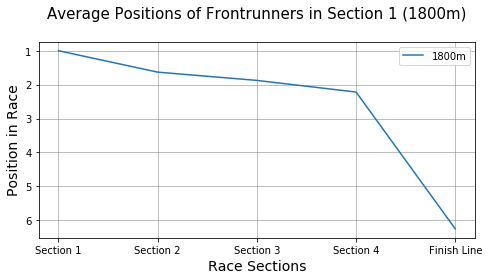

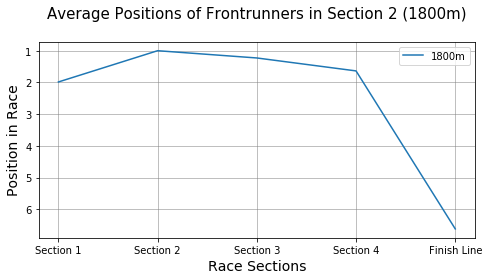

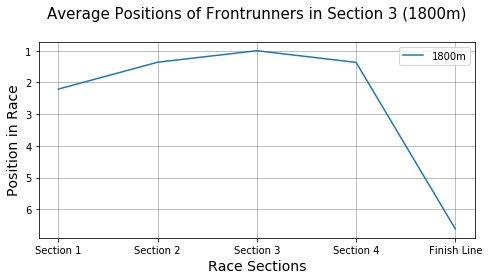

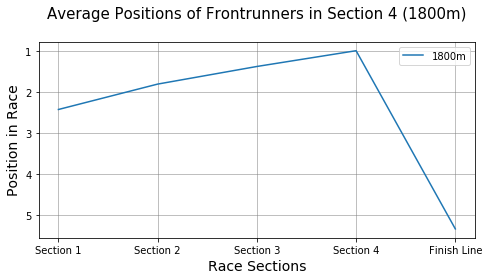

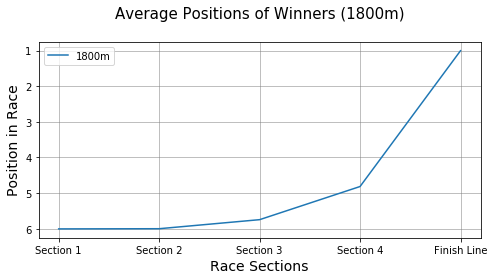

In [33]:
#creating line graphs to show frontrunner positions
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Frontrunners in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1800_means = frontrunner_section1_1800.filter(like='position_').mean()
frontrunner_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('frontrunners1_averages_1800_final.jpeg')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Frontrunners in Section 2 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1800_means = frontrunner_section2_1800.filter(like='position_').mean()
frontrunner_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('frontrunners2_averages_1800_final.jpeg')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Frontrunners in Section 3 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1800_means = frontrunner_section3_1800.filter(like='position_').mean()
frontrunner_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('frontrunners3_averages_1800_final.jpeg')

fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Frontrunners in Section 4 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1800_means = frontrunner_section4_1800.filter(like='position_').mean()
frontrunner_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('frontrunners4_averages_1800_final.jpeg')

#creating a graph to show average positions of winners throughout race
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Winners (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
frontrunner_1800_means = winners_1800.filter(like='position_').mean()
frontrunner_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')
plt.tight_layout()
plt.savefig('frontrunners5_averages_1800_final.jpeg')

### Slipstreamers

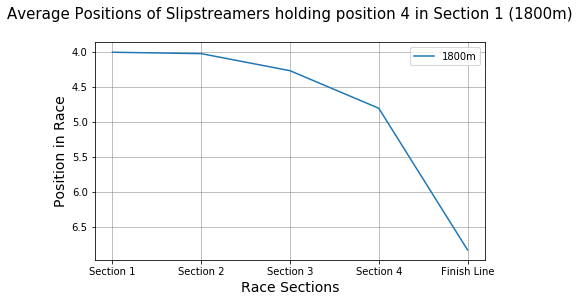

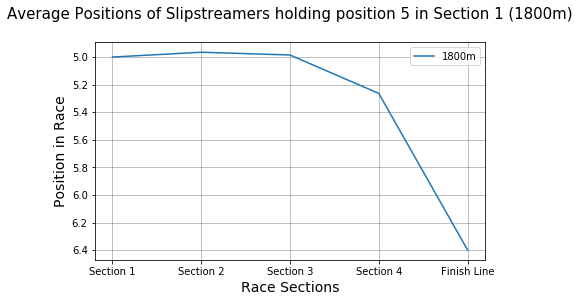

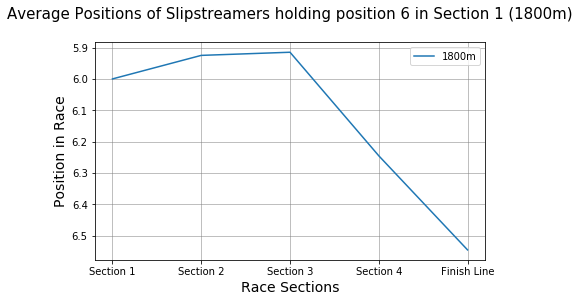

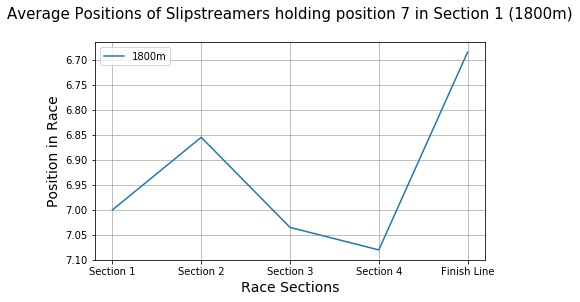

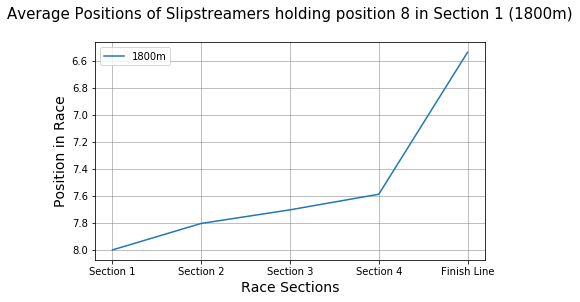

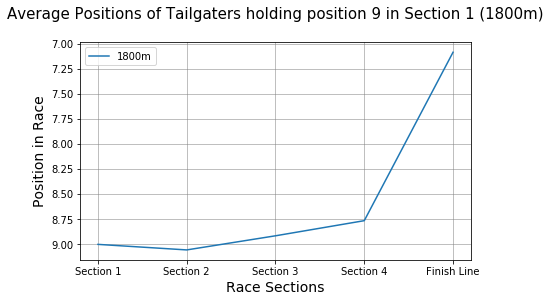

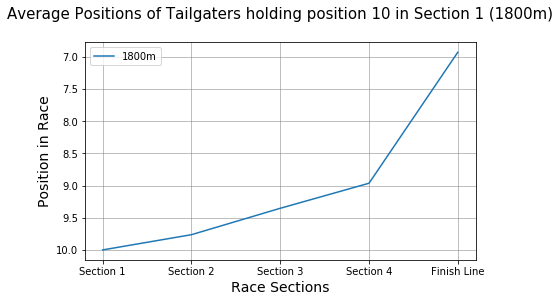

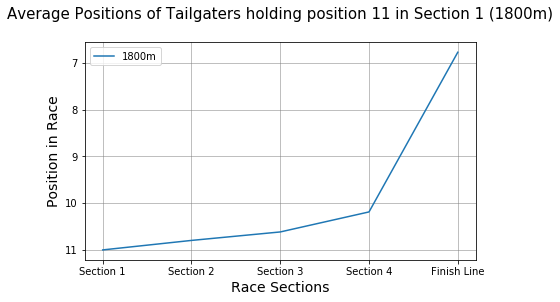

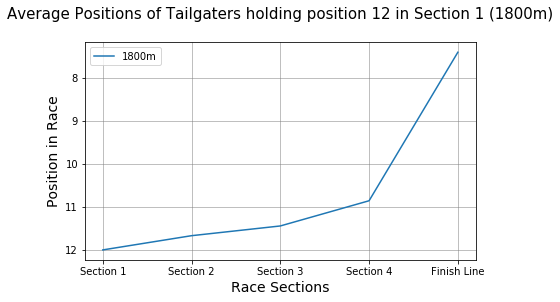

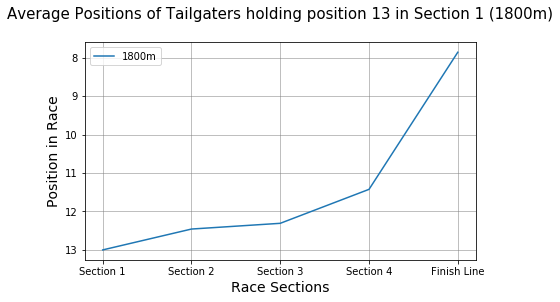

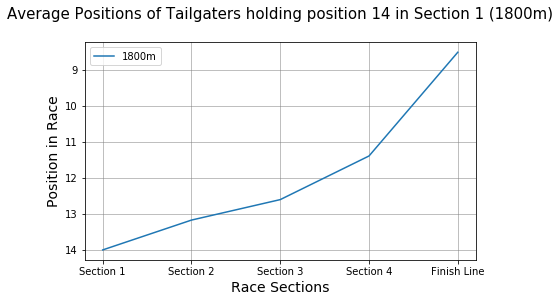

In [34]:
#creating line graphs to show slipstreaming positions
#positon 4
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 4 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p4_1800_means = slipstreamer_p4_1800.filter(like='position_').mean()
slipstreamer_p4_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 5
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 5 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p5_1800_means = slipstreamer_p5_1800.filter(like='position_').mean()
slipstreamer_p5_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 6
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 6 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p6_1800_means = slipstreamer_p6_1800.filter(like='position_').mean()
slipstreamer_p6_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 7
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 7 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p7_1800_means = slipstreamer_p7_1800.filter(like='position_').mean()
slipstreamer_p7_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 8
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Slipstreamers holding position 8 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
slipstreamer_p8_1800_means = slipstreamer_p8_1800.filter(like='position_').mean()
slipstreamer_p8_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 9
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 9 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p9_1800_means = tailgater_p9_1800.filter(like='position_').mean()
tailgater_p9_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 10
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 10 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p10_1800_means = tailgater_p10_1800.filter(like='position_').mean()
tailgater_p10_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 11
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 11 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p11_1800_means = tailgater_p11_1800.filter(like='position_').mean()
tailgater_p11_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 12
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 12 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p12_1800_means = tailgater_p12_1800.filter(like='position_').mean()
tailgater_p12_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 13
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 13 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p13_1800_means = tailgater_p13_1800.filter(like='position_').mean()
tailgater_p13_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

#positon 14
fig, ax = plt.subplots(figsize=(7, 4))
plt.title('Average Positions of Tailgaters holding position 14 in Section 1 (1800m)\n', fontsize = 15)
plt.xlabel('Race Sections', fontsize = 14)
plt.ylabel('Position in Race', fontsize = 14)
plt.gca().invert_yaxis()
tailgater_p14_1800_means = tailgater_p14_1800.filter(like='position_').mean()
tailgater_p14_1800_means.plot(ax=ax)
ax.legend(['1800m'])
ax.set_xticks(range(5))
#ax.set_xticklabels(frontrunner_section1_1400.filter(like='position_').columns)
ax.set_xticklabels(['Section 1', 'Section 2', 'Section 3', 'Section 4', 'Finish Line'])
plt.grid(True, lw = 0.5, ls = '-', c = '.50')

##### After checking the amount of data present in the 2000m, 2200m and 2400m dataframes, I have decided that there just does not exist enough data to get any decent results from and therefore have chosen to not continue with these race lengths.

In [35]:
frontrunner_section1_2000.shape

(57, 10)

In [36]:
frontrunner_section1_2200.shape

(39, 11)

In [37]:
frontrunner_section1_2400.shape

(9, 11)